In [1]:
!git clone https://github.com/sheelfshah/banditpylib.git

Cloning into 'banditpylib'...
remote: Enumerating objects: 6307, done.
remote: Counting objects: 100% (1633/1633), done.
remote: Compressing objects: 100% (971/971), done.
remote: Total 6307 (delta 1200), reused 1049 (delta 651), pack-reused 4674
Receiving objects: 100% (6307/6307), 10.04 MiB | 28.03 MiB/s, done.
Resolving deltas: 100% (4589/4589), done.


In [2]:
%cd banditpylib

/content/banditpylib


In [3]:
!make install

pip install --upgrade pip
     |████████████████████████████████| 1.6MB 6.9MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
pip install -r requirements.txt
     |████████████████████████████████| 223 kB 6.6 MB/s 
     |████████████████████████████████| 103 kB 9.4 MB/s 
     |████████████████████████████████| 55 kB 2.5 MB/s 
     |████████████████████████████████| 10.3 MB 8.5 MB/s 
     |████████████████████████████████| 21.6 MB 52.3 MB/s 
     |████████████████████████████████| 15.3 MB 233 kB/s 
     |████████████████████████████████| 9.9 MB 36.9 MB/s 
     |████████████████████████████████| 3.0 MB 37.6 MB/s 
     |████████████████████████████████| 1.0 MB 34.2 MB/s 
     |████████████████████████████████| 357 kB 44.8 MB/s 
     |████████████████████████████████| 280 kB 53.7 MB/s 
     |████████████████████████████████| 510 kB 55.7 MB/s 
     |████████████████████████████████| 27.4 MB 139 kB/s 
     |█████████████████

In [4]:
!pip3 uninstall matplotlib
!pip3 install matplotlib==3.1.3

Found existing installation: matplotlib 3.4.2
Uninstalling matplotlib-3.4.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.2
     |████████████████████████████████| 13.1 MB 125 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tempfile
import seaborn as sns
sns.set(style="darkgrid")

from banditpylib.bandits import LinearBandit, OrdinaryBandit
from banditpylib.arms import GaussianArm
from banditpylib.protocols import SinglePlayerProtocol, trial_data_messages_to_dict
from banditpylib.learners.linear_bandit_learner import LinUCB
from banditpylib.learners.ordinary_learner import UCB

In [2]:
num_arms = 100
horizon = 2000
delta = 1/horizon
lambda_reg = 1e-3

In [3]:
features = [np.random.normal(0, size=5) for _ in range(num_arms)]
for i in range(len(features)):
  features[i] = features[i] / np.linalg.norm(features[i])

theta = np.random.normal(0, size=5)
arm_means = [feature@theta for feature in features]
arms = [GaussianArm(mean, var=1) for mean in arm_means]

In [4]:
bandit = LinearBandit(features, theta)
learners = [LinUCB(features, delta, lambda_reg), UCB(num_arms)]

In [5]:
intermediate_regrets = list(range(0, horizon+1, 50))
temp_file = tempfile.NamedTemporaryFile()

In [6]:
game = SinglePlayerProtocol(bandit, learners,
                             intermediate_regrets=intermediate_regrets, horizon=horizon)

In [7]:
game.play(trials=200, output_filename=temp_file.name)

In [8]:
data_df = trial_data_messages_to_dict(temp_file.name)

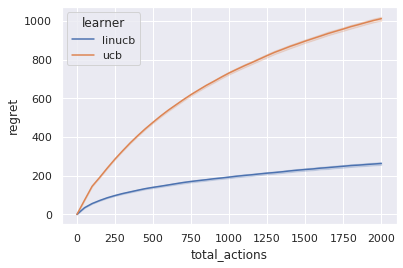

In [9]:
sns.lineplot(x='total_actions', y='regret', hue='learner', data=data_df)
plt.show()